In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

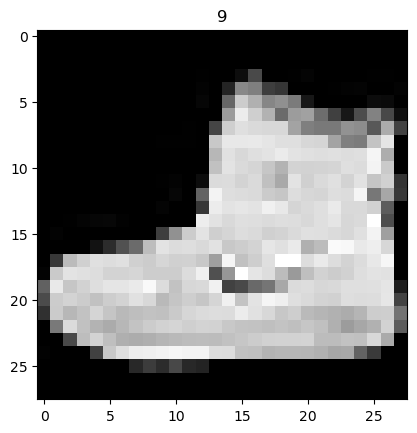

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

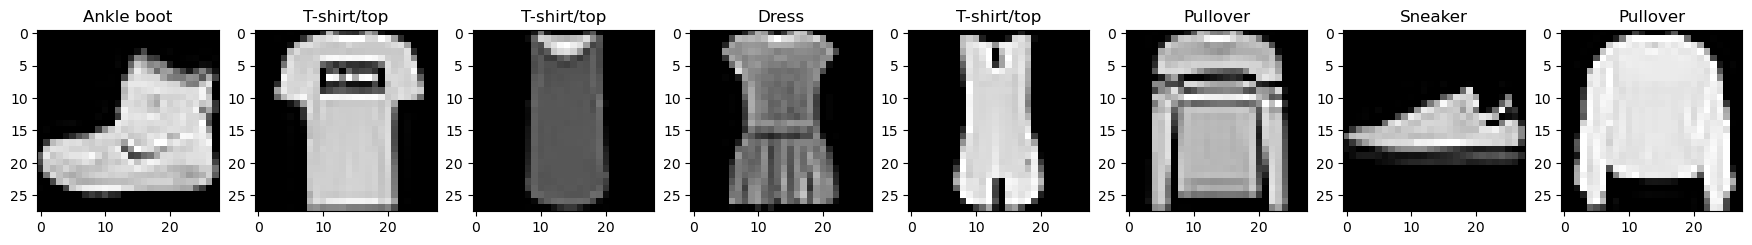

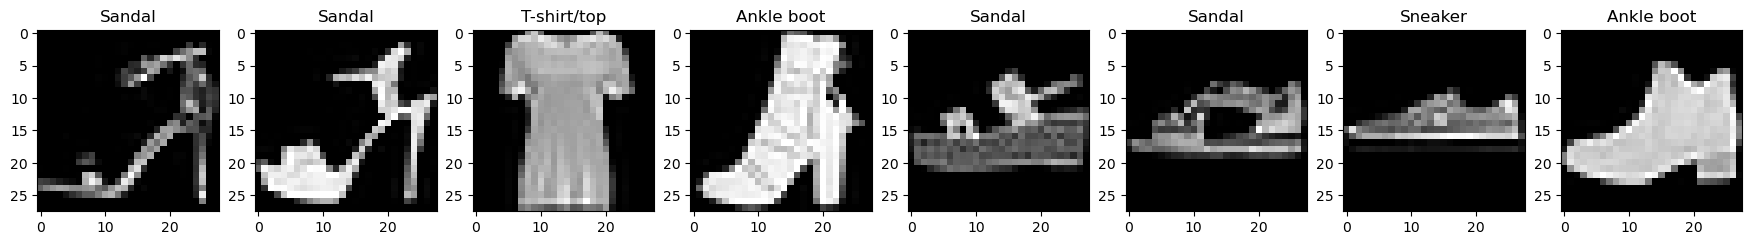

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols) #nrows=1줄
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [7]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Dense Layer를 기반으로 모델을 생성

In [8]:
INPUT_SIZE = 28

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([ # Sequential하게 모델을 계속해서 만듦
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)), # 28*28 gray scale로 들어오고 나면 784개 1차원으로 뭉게라 -> 784개의 feature
    Dense(100, activation='relu'), #
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : one-hot encoding한 것

In [11]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels) #one-hot encoding --> 2차원으로 바뀜
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [12]:
train_images.shape #(60000개의 이미지, 28*28)

(60000, 28, 28)

In [13]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5119 - accuracy: 0.8207
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3413 - accuracy: 0.8760
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3176 - accuracy: 0.8825
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2990 - accuracy: 0.8904
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2871 - accuracy: 0.8919
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.8982
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2648 - accuracy: 0.9009
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2533 - accuracy: 0.9062
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [14]:
print(history.history['loss'])
print(history.history['accuracy'])


[0.5119072198867798, 0.37857863306999207, 0.3413039743900299, 0.31760358810424805, 0.29899582266807556, 0.28713470697402954, 0.2735237777233124, 0.26482513546943665, 0.25327417254447937, 0.24541157484054565, 0.23724037408828735, 0.23121611773967743, 0.22509725391864777, 0.21942757070064545, 0.21316534280776978, 0.20647311210632324, 0.2020616978406906, 0.19592969119548798, 0.1931285709142685, 0.18958613276481628]
[0.8207499980926514, 0.8637833595275879, 0.8760333061218262, 0.8825333118438721, 0.8903833627700806, 0.8919000029563904, 0.8981999754905701, 0.9009333252906799, 0.9061999917030334, 0.9082833528518677, 0.9104666709899902, 0.9129499793052673, 0.914983332157135, 0.9170666933059692, 0.9186000227928162, 0.9222166538238525, 0.9246000051498413, 0.92535001039505, 0.9263333082199097, 0.9278333187103271]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [15]:
test_images.shape #3차원

(10000, 28, 28)

In [16]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [17]:
np.expand_dims(test_images[0], axis=0).shape # test_images[0] : 2차원(28,28) --> 3차원으로 넣어서 예측해주어야 함 // axis=0 : 맨 앞에 차원 추가

(1, 28, 28)

In [18]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba)) #np.squeeze : 다시 차원 축소
print('predicted class value:', pred)


1/1 [==============================] - 0s 32ms/step
softmax output: [[7.3134818e-09 1.6580196e-11 1.2194268e-10 4.0335492e-11 2.6359977e-08
  8.5542467e-04 1.3895476e-08 9.5045060e-02 3.0441047e-09 9.0409946e-01]]
predicted class value: 9


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

In [20]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8793


[0.3876238763332367, 0.8792999982833862]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [21]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행. 

In [23]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 0.6042 - accuracy: 0.7933 - val_loss: 0.4550 - val_accuracy: 0.8352
Epoch 2/20
399/399 [==============================] - 2s 5ms/step - loss: 0.4167 - accuracy: 0.8527 - val_loss: 0.4136 - val_accuracy: 0.8543
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3720 - accuracy: 0.8697 - val_loss: 0.3728 - val_accuracy: 0.8670
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3464 - accuracy: 0.8765 - val_loss: 0.3891 - val_accuracy: 0.8612
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3244 - accuracy: 0.8836 - val_loss: 0.3684 - val_accuracy: 0.8651
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3111 - accuracy: 0.8881 - val_loss: 0.3430 - val_accuracy: 0.8770
Epoch 7/20
399/399 [==============================] - 2s 6ms/step - loss: 0.2978 - accuracy: 0.8921 - val_loss: 0.3488 - val_accuracy: 0.8737
Epoch 

In [25]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6041860580444336, 0.41667965054512024, 0.37203601002693176, 0.3463631570339203, 0.3243500590324402, 0.3111260235309601, 0.29781270027160645, 0.2879956066608429, 0.2772257626056671, 0.2671842575073242, 0.2595685124397278, 0.25216400623321533, 0.24229082465171814, 0.23931124806404114, 0.23183727264404297, 0.2228347510099411, 0.22141720354557037, 0.21371591091156006, 0.208701491355896, 0.2058500349521637]
[0.7932941317558289, 0.8527451157569885, 0.8696666955947876, 0.8765293955802917, 0.8836274743080139, 0.8880784511566162, 0.8921176195144653, 0.895784318447113, 0.8986666798591614, 0.902470588684082, 0.9062941074371338, 0.9062352776527405, 0.9113529324531555, 0.9104902148246765, 0.9153333306312561, 0.9179215431213379, 0.9186274409294128, 0.9208235144615173, 0.9228431582450867, 0.9246078133583069]
[0.45503002405166626, 0.41357097029685974, 0.3728439509868622, 0.3891116678714752, 0.3684210479259491, 0.3430080711841583, 0.3488408029079437, 0.33122849464416504, 0.3327605128288269, 0.332701

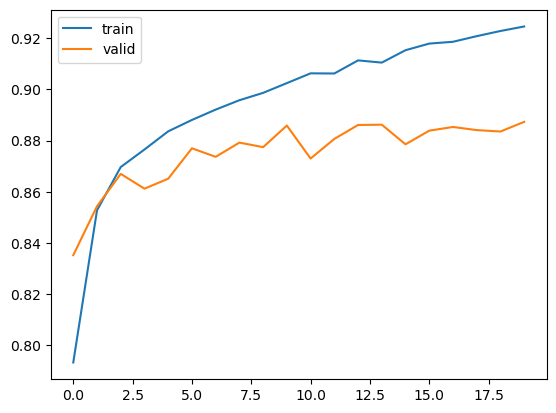

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [27]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

In [28]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor) #Flatten(생성 파라미터)28*28 -->784 (입력인자)
x = Dense(100, activation='relu',name='Dense1')(x)
x = Dense(30, activation='relu',name='Dense2')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 100)               78500     
                                                                 
 Dense2 (Dense)              (None, 30)                3030      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [29]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs) #units = 10

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [30]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [31]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_2 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [32]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
1 <__main__.CustomDense object at 0x7fb62527e6d0>
2 <__main__.CustomDense object at 0x7fb62520ecd0>
3 <keras.layers.activation.relu.ReLU object at 0x7fb62520e8d0>


In [33]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [34]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model


In [35]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


In [36]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [37]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 30)                3030      
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))


Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 0.6280 - accuracy: 0.7865 - val_loss: 0.4772 - val_accuracy: 0.8356
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4236 - accuracy: 0.8534 - val_loss: 0.4091 - val_accuracy: 0.8543
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3789 - accuracy: 0.8666 - val_loss: 0.3976 - val_accuracy: 0.8603
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3514 - accuracy: 0.8751 - val_loss: 0.3958 - val_accuracy: 0.8560
Epoch 5/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3340 - accuracy: 0.8817 - val_loss: 0.3464 - val_accuracy: 0.8770
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3162 - accuracy: 0.8856 - val_loss: 0.3485 - val_accuracy: 0.8724
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3040 - accuracy: 0.8904 - val_loss: 0.3611 - val_accuracy: 0.8688
Epoch 

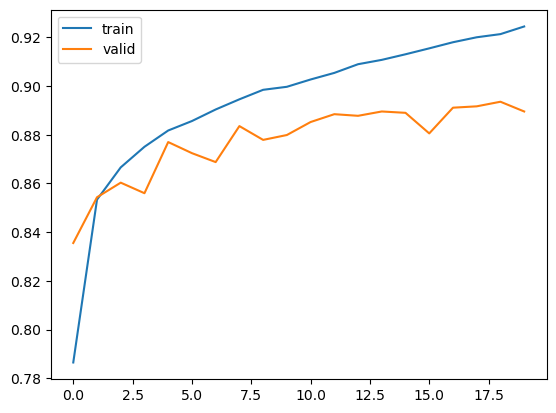

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [40]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)


40/40 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8787


[0.3718595504760742, 0.8787000179290771]

### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [41]:
!pwd

/kaggle/working


In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 4s 5ms/step - loss: 0.6149 - accuracy: 0.7896 - val_loss: 0.4526 - val_accuracy: 0.8347
Epoch 2/10
399/399 [==============================] - 2s 4ms/step - loss: 0.4162 - accuracy: 0.8526 - val_loss: 0.4260 - val_accuracy: 0.8470
Epoch 3/10
389/399 [============================>.] - ETA: 0s - loss: 0.3721 - accuracy: 0.8681
Epoch 3: val_loss improved from inf to 0.39895, saving model to /kaggle/working/weights.03-0.40.hdf5
399/399 [==============================] - 2s 4ms/step - loss: 0.3715 - accuracy: 0.8686 - val_loss: 0.3989 - val_accuracy: 0.8551
Epoch 4/10
399/399 [==============================] - 2s 4ms/step - loss: 0.3422 - accuracy: 0.8769 - val_loss: 0.3541 - val_accuracy: 0.8681
Epoch 5/10
399/399 [==============================] - 2s 4ms/step - loss: 0.3251 - accuracy: 0.8835 - val_loss: 0.3663 - val_accuracy: 0.8662
Epoch 6/10
398/399 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8886
Epoch 6:

In [43]:
!ls -lia
#!rm -rf weight*
#!ls -lia


total 2692
   131080 drwxr-xr-x 2 root root    4096 Mar  5 13:48 .
280366174 drwxr-xr-x 6 root root    4096 Mar  5 13:43 ..
   131081 ---------- 1 root root 1714023 Mar  5 13:48 __notebook__.ipynb
   131082 -rw-r--r-- 1 root root  344040 Mar  5 13:48 weights.03-0.40.hdf5
   131083 -rw-r--r-- 1 root root  344040 Mar  5 13:48 weights.06-0.34.hdf5
   131084 -rw-r--r-- 1 root root  344040 Mar  5 13:48 weights.09-0.33.hdf5


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [44]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 3s 4ms/step - loss: 0.5866 - accuracy: 0.7984 - val_loss: 0.4423 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4136 - accuracy: 0.8555 - val_loss: 0.4157 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3733 - accuracy: 0.8682 - val_loss: 0.3776 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3448 - accuracy: 0.8789 - val_loss: 0.3720 - val_accuracy: 0.8638 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3233 - accuracy: 0.8841 - val_loss: 0.3579 - val_accuracy: 0.8739 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3080 - accuracy: 0.8889 - val_loss: 0.3490 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 3s 4ms/step - loss: 0.6053 - accuracy: 0.7939 - val_loss: 0.4589 - val_accuracy: 0.8334
Epoch 2/30
399/399 [==============================] - 2s 5ms/step - loss: 0.4168 - accuracy: 0.8543 - val_loss: 0.4110 - val_accuracy: 0.8536
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3762 - accuracy: 0.8648 - val_loss: 0.3931 - val_accuracy: 0.8588
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8750 - val_loss: 0.3728 - val_accuracy: 0.8659
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3282 - accuracy: 0.8805 - val_loss: 0.3524 - val_accuracy: 0.8736
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3119 - accuracy: 0.8865 - val_loss: 0.3487 - val_accuracy: 0.8726
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.8906 - val_loss: 0.3386 - val_accuracy: 0.8770
Epoch 

In [46]:
!rm weigh*

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 4s 6ms/step - loss: 0.5976 - accuracy: 0.7967 - val_loss: 0.4619 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 2/40
399/399 [==============================] - 2s 5ms/step - loss: 0.4122 - accuracy: 0.8545 - val_loss: 0.3915 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 3/40
399/399 [==============================] - 2s 5ms/step - loss: 0.3691 - accuracy: 0.8678 - val_loss: 0.4056 - val_accuracy: 0.8543 - lr: 0.0010
Epoch 4/40
399/399 [==============================] - 2s 5ms/step - loss: 0.3423 - accuracy: 0.8774 - val_loss: 0.3676 - val_accuracy: 0.8658 - lr: 0.0010
Epoch 5/40
399/399 [==============================] - 2s 5ms/step - loss: 0.3226 - accuracy: 0.8841 - val_loss: 0.3478 - val_accuracy: 0.8734 - lr: 0.0010
Epoch 6/40
399/399 [==============================] - 2s 5ms/step - loss: 0.3102 - accuracy: 0.8858 - val_loss: 0.3344 - val_accuracy: 0.8787 - lr: 0.0010
Epoch 7/40
399/399 [==============================] - 2s 6ms/step - lo

In [48]:
!ls -lia

total 5856
   131080 drwxr-xr-x 2 root root    4096 Mar  5 13:50 .
280366174 drwxr-xr-x 6 root root    4096 Mar  5 13:43 ..
   131081 ---------- 1 root root 2505861 Mar  5 13:50 __notebook__.ipynb
   131082 -rw-r--r-- 1 root root  344080 Mar  5 13:49 weights.01-0.46.hdf5
   131083 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.02-0.39.hdf5
   131084 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.04-0.37.hdf5
   131085 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.05-0.35.hdf5
   131086 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.06-0.33.hdf5
   131087 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.08-0.32.hdf5
   131088 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.09-0.31.hdf5
   131089 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.15-0.30.hdf5
   131090 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.16-0.30.hdf5
   131091 -rw-r--r-- 1 root root  344080 Mar  5 13:50 weights.19-0.30.hdf5
